### Compare Posteriors $\pi_{l_0}$, $\pi_{l_1}$, $\pi_{l_2}$ across Levels


This notebook compares how well the samples from the posterior distributions with respect to different discretizations of the forward model $F_l$  approximate each other.

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pickle 
import seaborn as sns

In [2]:
path_indices = [1,9,10,27,45,46] # select wich components to plot

#load chains that are stored in a dictionary
with open('MCMC_chains\MCMC_chains_dict_length_20000_numChains_2_h_1_32.pkl', 'rb') as f:
    chains_MCMC_l2_dict = pickle.load(f)

with open('MCMC_chains\MCMC_chains_dict_length_20000_numChains_2_h_1_16.pkl', 'rb') as f:
    chains_MCMC_l1_dict = pickle.load(f)

with open('MCMC_chains\MCMC_chains_dict_length_20000_numChains_2_h_1_8.pkl', 'rb') as f:
    chains_MCMC_l0_dict = pickle.load(f)

## Benchmark approach
The MCMC samples are generated according to the benchmark.

### Plot densities:

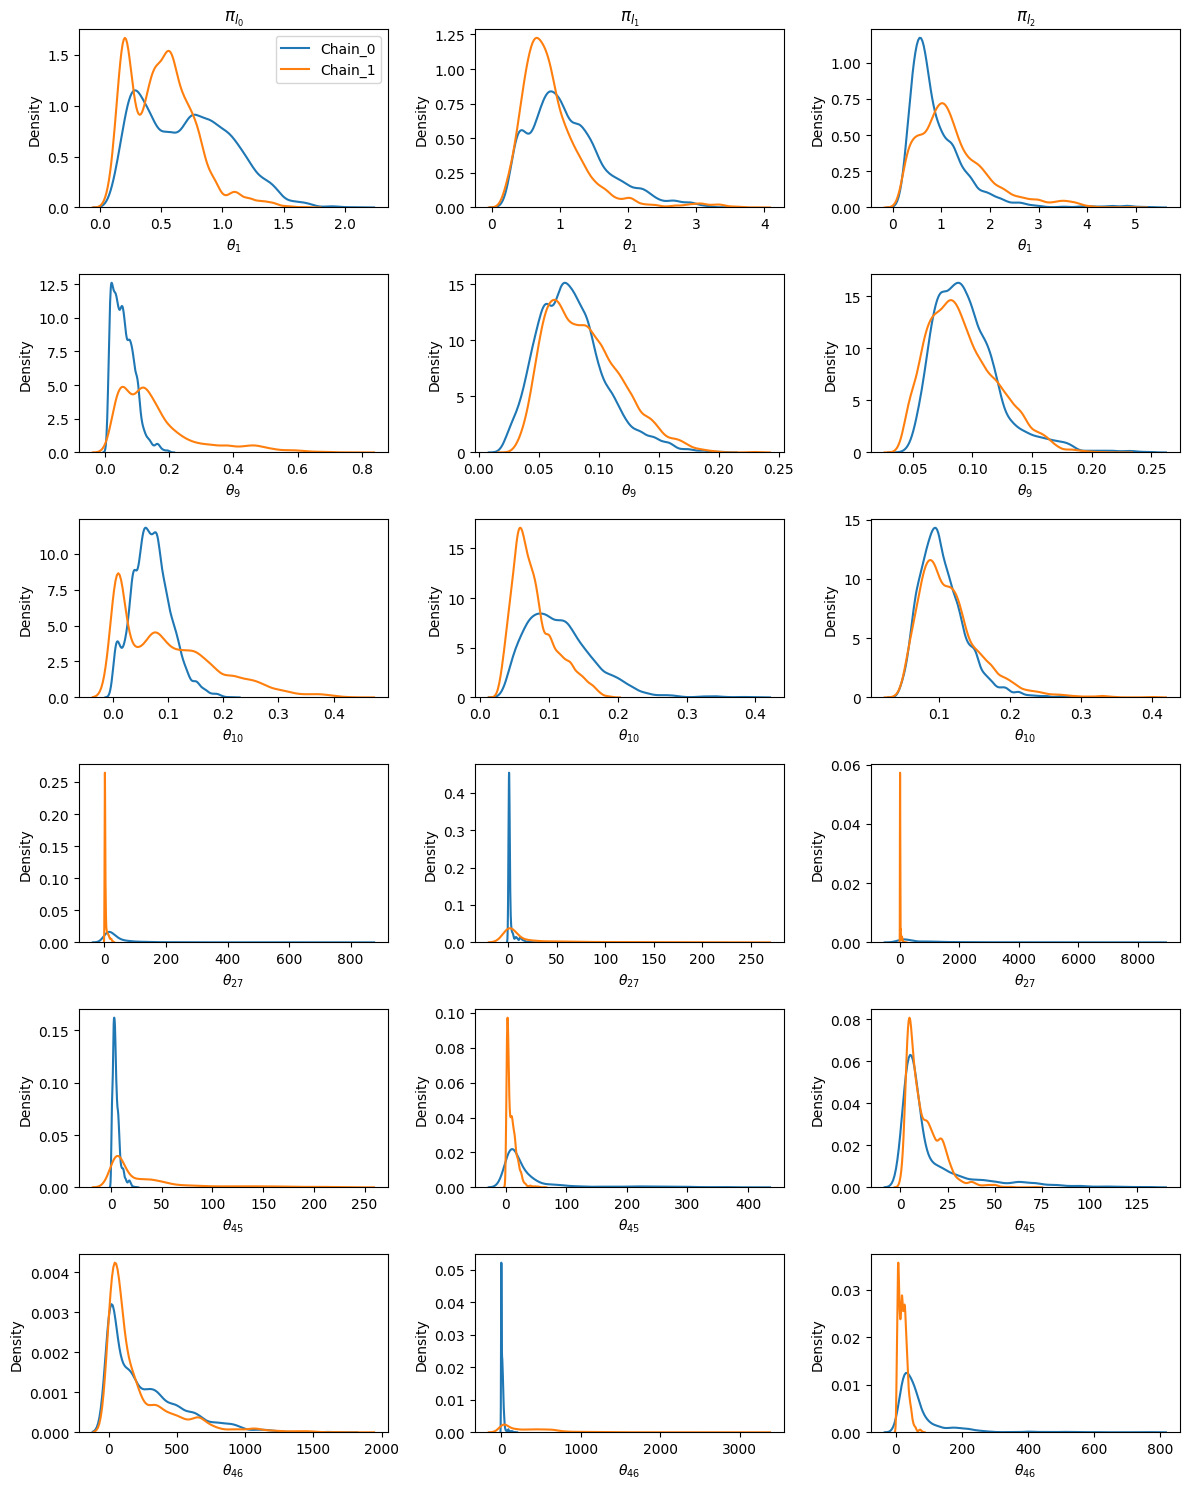

In [10]:
plot_log = False # if True log(samples) is drawn.

fig ,axs = plt.subplots(nrows=len(path_indices), ncols=3, figsize=(12,15))


for idx, i in enumerate(path_indices):
    if plot_log: 
        sns.histplot(np.log(chains_MCMC_l0_dict['chain_0'][:,i]), ax=axs[idx,0], label='Chain_0')
        sns.histplot(np.log(chains_MCMC_l0_dict['chain_1'][:,i]), ax=axs[idx,0], label='Chain_1')
        sns.histplot(np.log(chains_MCMC_l1_dict['chain_0'][:,i]), ax=axs[idx,1])
        sns.histplot(np.log(chains_MCMC_l1_dict['chain_1'][:,i]), ax=axs[idx,1])
        sns.histplot(np.log(chains_MCMC_l2_dict['chain_0'][:,i]), ax=axs[idx,2])
        sns.histplot(np.log(chains_MCMC_l2_dict['chain_1'][:,i]), ax=axs[idx,2])
    else:
        sns.kdeplot((chains_MCMC_l0_dict['chain_0'][:,i]), ax=axs[idx,0], label='Chain_0')
        sns.kdeplot((chains_MCMC_l0_dict['chain_1'][:,i]), ax=axs[idx,0], label='Chain_1')
        sns.kdeplot((chains_MCMC_l1_dict['chain_0'][:,i]), ax=axs[idx,1])
        sns.kdeplot((chains_MCMC_l1_dict['chain_1'][:,i]), ax=axs[idx,1])
        sns.kdeplot((chains_MCMC_l2_dict['chain_0'][:,i]), ax=axs[idx,2])
        sns.kdeplot((chains_MCMC_l2_dict['chain_1'][:,i]), ax=axs[idx,2])        


    axs[idx,0].set_xlabel(r'$\theta_{%d}$'%i)
    axs[idx,1].set_xlabel(r'$\theta_{%d}$'%i)
    axs[idx,2].set_xlabel(r'$\theta_{%d}$'%i)


axs[0,0].legend()
axs[0,0].set_title(r'$\pi_{l_0}$')
axs[0,1].set_title(r'$\pi_{l_1}$')
axs[0,2].set_title(r'$\pi_{l_2}$')

fig.tight_layout()

## Not-logspace approach
The samples are generated  from a Gaussian and then exp(sample) is passed to the model.

In [8]:
#load chains that are stored in a dictionary
with open('MCMC_chains_not_logspace\MCMC_chains_dict_length_200000_numChains_2_h_1_32.pkl', 'rb') as f:
    chains_not_logspace_l2_dict = pickle.load(f)

with open('MCMC_chains_not_logspace\MCMC_chains_dict_length_200000_numChains_2_h_1_16.pkl', 'rb') as f:
    chains_not_logspace_l1_dict = pickle.load(f)

with open('MCMC_chains_not_logspace\MCMC_chains_dict_length_200000_numChains_2_h_1_8.pkl', 'rb') as f:
    chains_not_logspace_l0_dict = pickle.load(f)

### Plot densities:

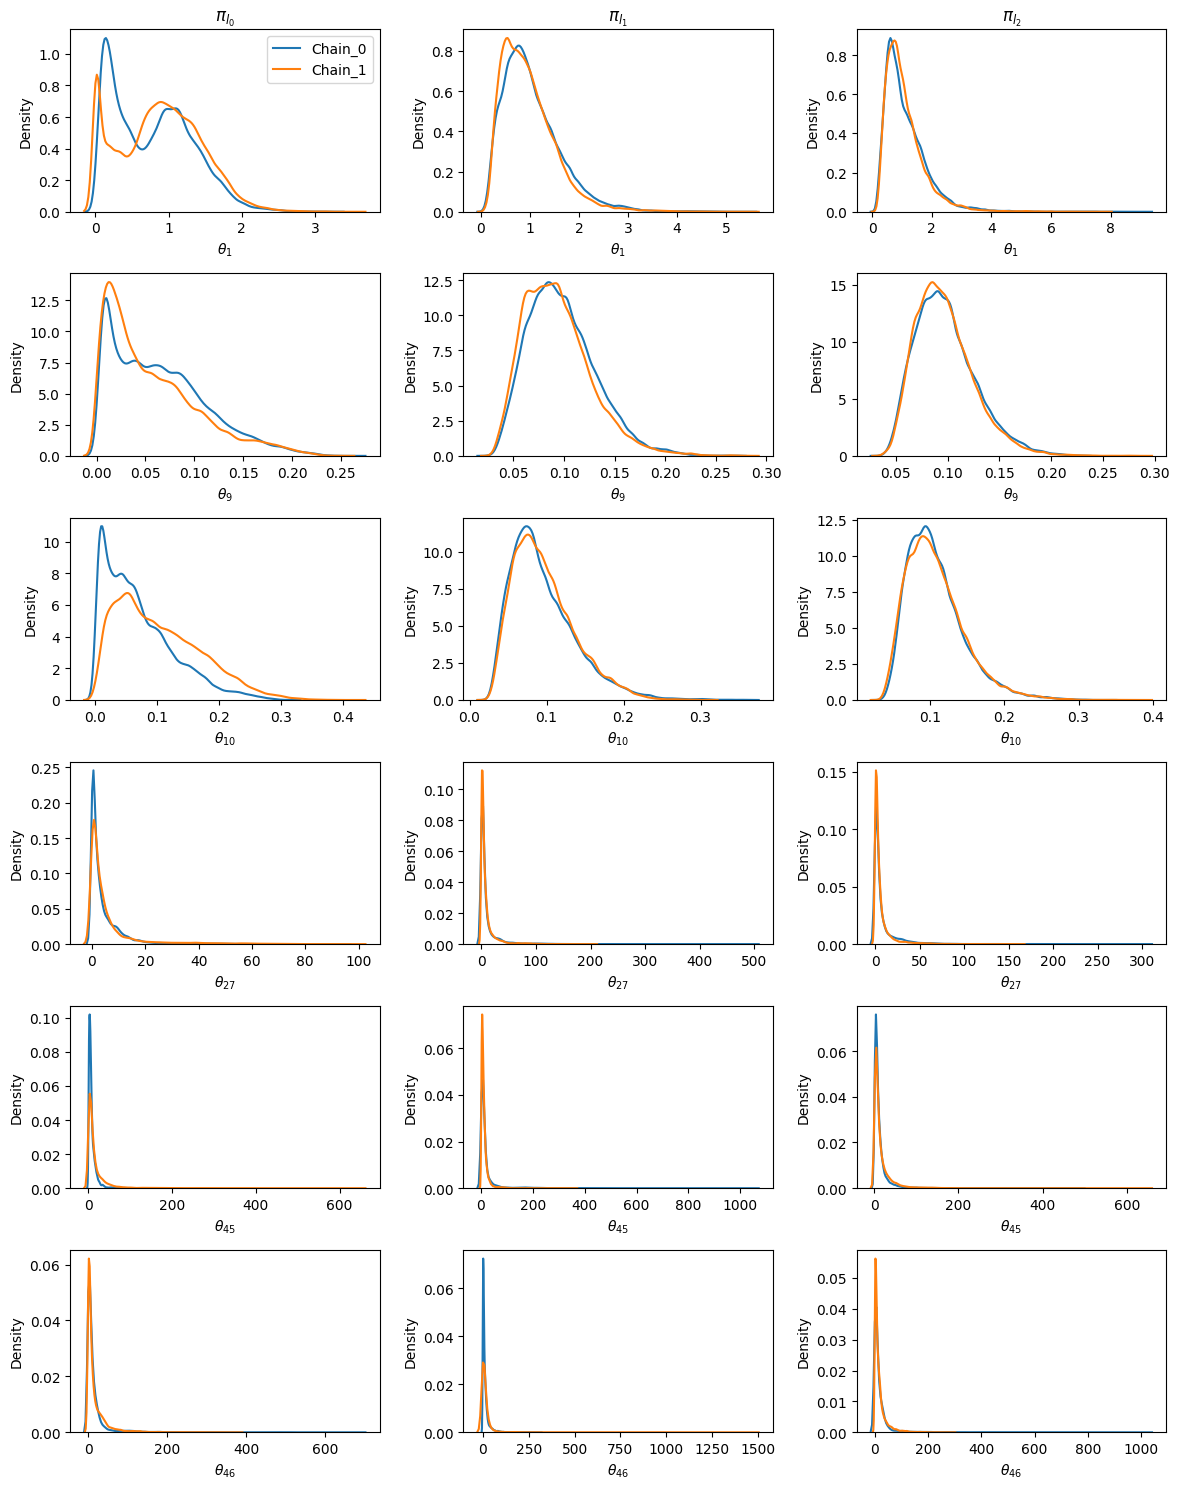

In [11]:
plot_exp = True # if True exp(samples) is drawn.

fig ,axs = plt.subplots(nrows=len(path_indices), ncols=3, figsize=(12,15))


for idx, i in enumerate(path_indices):
    if plot_exp: 
        sns.kdeplot(np.exp(chains_not_logspace_l0_dict['chain_0'][:,i]), ax=axs[idx,0], label='Chain_0')
        sns.kdeplot(np.exp(chains_not_logspace_l0_dict['chain_1'][:,i]), ax=axs[idx,0], label='Chain_1')
        sns.kdeplot(np.exp(chains_not_logspace_l1_dict['chain_0'][:,i]), ax=axs[idx,1])
        sns.kdeplot(np.exp(chains_not_logspace_l1_dict['chain_1'][:,i]), ax=axs[idx,1])
        sns.kdeplot(np.exp(chains_not_logspace_l2_dict['chain_0'][:,i]), ax=axs[idx,2])
        sns.kdeplot(np.exp(chains_not_logspace_l2_dict['chain_1'][:,i]), ax=axs[idx,2])
    else:
        sns.kdeplot((chains_not_logspace_l0_dict['chain_0'][:,i]), ax=axs[idx,0], label='Chain_0')
        sns.kdeplot((chains_not_logspace_l0_dict['chain_1'][:,i]), ax=axs[idx,0], label='Chain_1')
        sns.kdeplot((chains_not_logspace_l1_dict['chain_0'][:,i]), ax=axs[idx,1])
        sns.kdeplot((chains_not_logspace_l1_dict['chain_1'][:,i]), ax=axs[idx,1])
        sns.kdeplot((chains_not_logspace_l2_dict['chain_0'][:,i]), ax=axs[idx,2])
        sns.kdeplot((chains_not_logspace_l2_dict['chain_1'][:,i]), ax=axs[idx,2])        


    axs[idx,0].set_xlabel(r'$\theta_{%d}$'%i)
    axs[idx,1].set_xlabel(r'$\theta_{%d}$'%i)
    axs[idx,2].set_xlabel(r'$\theta_{%d}$'%i)


axs[0,0].legend()
axs[0,0].set_title(r'$\pi_{l_0}$')
axs[0,1].set_title(r'$\pi_{l_1}$')
axs[0,2].set_title(r'$\pi_{l_2}$')

fig.tight_layout()